In [1]:
from sklearn.datasets import make_classification  #helps to make a dummy data set.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x,y = make_classification(n_samples=1000000, n_features=2,n_classes=2, 
                          n_informative=2, n_redundant= 0, 
                          n_clusters_per_class=1, random_state=60)

# x contains the data point whereas y contains the corresponding class level.


In [3]:
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
print(x.shape)    #Data points
print(y.shape)   #class levels

(1000000, 2)
(1000000,)


In [5]:
print(x)

[[-0.45622346 -2.00787554]
 [ 0.51033642 -0.66193302]
 [-0.94960972 -1.21611803]
 ...
 [-1.02275592 -0.14979745]
 [-0.60804739 -1.87694858]
 [-2.55317027  0.13952058]]


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify=y,test_size = 0.3, random_state = 42)

In [7]:
print(X_train.shape)
print(Y_train.shape)

(700000, 2)
(700000,)


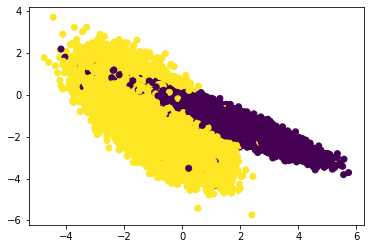

In [8]:
# checking the distribution of X_train.
import matplotlib.pyplot as plt
plt.scatter(X_test[:,0], X_test[:,1],c=Y_test)
plt.show()

# Implementing Custom GridSearchCV

Hyperparameter tuning is a powerful tool to enhance your supervised learning models— improving accuracy, precision, and other important metrics by searching the optimal model parameters based on different scoring methods. There are two main options available from sklearn: GridSearchCV and RandomSearchCV. 

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

In [10]:
classifier = KNeighborsClassifier()  # we will compute the best K for knn using Gridsearch method.

K_values = {'n_neighbors':[2,5,7,9,11,13,15,17,19,21,23]}  # i will test the model for this list of K.
folds = 3       # i want 3 cross validation.


In [11]:
import random
# the below clas will split the X_train randomly and return the thier indeces. 
def randomly_select_60_percent_indices_in_range_from_1_to_len(X_train):
    return random.sample(range(0, len(X_train)), int(0.6*len(X_train))) 
    # i am extracting the index of 60% point from the X_train.

        # the above function will help us to select the random data set for training the model.
        #extracting of the data will be done on the basis of index
#randomly_select_60_percent_indices_in_range_from_1_to_len(X_train) 
#index will help us to extrac the class level from the Y_train.  

In [12]:
def GridSearch(X_train,Y_train,classifier, K_values, folds):
    trainscores = []  # train score for each k.
    testscores  = []    
    for k in tqdm(K_values['n_neighbors']):   # K=2 for the first iternation. Three cross validation will be
        trainscores_folds = []    #score for one k but three validation.             #done for k = 2 only.
        testscores_folds  = []
        for j in range(0, folds):  #3 fold will be done for each value of K.
            # check this out: https://stackoverflow.com/a/9755548/4084039
            #function calling to split the X_train.
            train_indices = randomly_select_60_percent_indices_in_range_from_1_to_len(X_train) 
                                                                    #will change in each iteration.
            test_indices  = list(set(list(range(1, len(X_train)))) - set(train_indices))
                            #all indeces-train indeces  = test indeces.
            # note that from the above code the X_train has splited in two parts.                
            # selecting the data points based on the train_indices and test_indices
            
            # this can be consider as first cross validation data set.
            x_train = X_train[train_indices]  #extracting the data point as nd array.
            x_train_C_level = Y_train[train_indices]    #class level.
            x_test  = X_train[test_indices]
            x_test_C_level  = Y_train[test_indices]

            classifier.n_neighbors = k  #k=2 for the first iterantion this will chage in second
            classifier.fit(x_train,x_train_C_level)

            y_predicted = classifier.predict(x_test)
            testscores_folds.append(accuracy_score(x_test_C_level, y_predicted))

            y_predicted = classifier.predict(x_train)
            trainscores_folds.append(accuracy_score(x_train_C_level, y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores

In [13]:
trainscores,testscores = GridSearch(X_train,Y_train,classifier, K_values, folds)

100%|███████████████████████████████████████████| 11/11 [17:09<00:00, 93.60s/it]


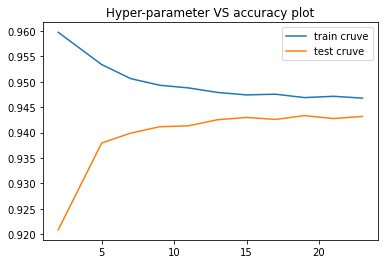

In [17]:
plt.plot(K_values['n_neighbors'],trainscores, label='train cruve')
plt.plot(K_values['n_neighbors'],testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [18]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

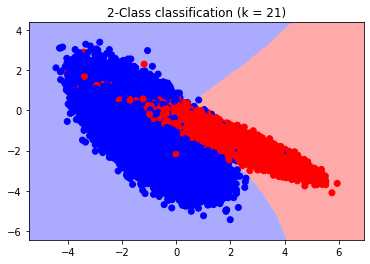

In [19]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 21)
neigh.fit(X_train, Y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], Y_train, neigh)